![agents](images/header.jpg)
# Análisis sintáctico
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/nlp/blob/master/Introducción.ipynb)

![ ](images/blank.png)
## Definición

El objetivo del análisis sintáctico es analizar un flujo de caracteres, o de tokens, para identificar la estructura en frases del mensaje.

![](images/nlp02d.png)

En las aproximaciones al procesamiento de lenguaje natural basada en [lingüísticas generativas](https://en.wikipedia.org/wiki/Generative_grammar), el análisis sintáctico suele referirse a encontrar la estructura gramatical del texto en términos de las frases que lo conforman. Esta es posiblemente el área mejor establecida en el campo de procesamiento de lenguaje natural gracias a los avances realizados en el área de gramáticas formales/generativas.

### Gramática

La Real Academia de la Lengua define la [gramática](drive.google.com/drive/folders/0B3Xu6MK8u7nbWFVIai04SWhMMXM) como:

> 3 f. Parte de la lingüística que estudia los elementos de una lengua, así como la forma en que estos se organizan y se combinan. 

La gramática se enfoca en las categorías a las que pertenece cada elemento lingüístico (no en el significado, que corresponde a la semántica) para comprender las formas en que estos elementos se pueden combinar para formar estructuras, oraciones y frases (a lo que llamamos sintaxis).

## Gramáticas formales

Una gramática (formal) se define como la tupla

$$G = (N,\Sigma,P,S)$$

donde

* $N$ es un conjunto finito de símbolos  no-terminales (variables a substituir).
* $\Sigma$ es un conjunto finito de símbolos terminales llamado el *alfabeto* o *vocabulario*. En el caso de gramáticas asociadas a los lenguajes naturales, el vocabulario es usualmente un conjunto de letras, signos, palabras, morfemas, sonidos y otros tokens.
* $S\in N$ es el *símbolo inicial*, es decir el símbolo no terminal desde donde se inicia la construcción de una *'frase'*
* $P = \{\alpha \to \beta\ \vert\ \alpha \in (N \cup \Sigma)^* N (N \cup \Sigma)^*, \beta \in (N \cup \Sigma)^* \}$ es un conjunto finito de *reglas de producción*, es decir, reglas que definen cómo pueden irse reemplazando los símbolos no-terminales, desde el símbolo inicial, hasta tener una frase terminada.

La forma de las reglas de producción determinan el tipo de gramática y el correspondiente autómata. 

Cada gramática está asociado a un tipo de *autómata* que sería, en realidad, el responsable de reconocer los patrones generables por la gramática correspondiente. Un lenguaje, es el conjunto de secuencias o cadenas sobre $\Sigma$ (es decir, $L(G) \subseteq \Sigma^*$) que pueden ser generadas por una gramática dada $G$. 

Los tipos principales de gramáticas/lenguajes/autómata están definidos mediante la jerarquía de Chomsky:

Gramática | Lenguaje | Autómata
-| 
Tipo 0 | Recursivamente enumerable |	Máquina de Turing
Tipo 1 | Dependiente del contexto | Autómata linealmente acotado
Tipo 2 | Independiente del contexto | Autómata de pila
Tipo 3 | Regular | Autómata finito

El orden del tipo de gramática, en esta jerarquía, aumenta conforme se agregan restricciones a las reglas de producción y se delimita con ello las producciones que conforman el lenguaje correspondiente. 

### Gramáticas sin restricciones
Las gramáticas de tipo 0, o *gramáticas sin restricciones*, son gramáticas en las que las reglas de producción, $\alpha \to \beta$, presentan la única restricción (ya establecida) de que el lado izquierdo de la regla contenga al menos un símbolo no terminal. Los lenguajes que produce una gramática sin restricciones son denominados *Turing-computables* o *parcialmente decidibles*. Esto porque el autómata que los reconoce puede no terminar nunca cuando la cadena no pertenece al lenguaje (entrando en un loop infinito). Esta característica hace poco viable su aplicación práctica, sin embargo, son de gran utilidad teórica.

### Gramáticas sensibles al contexto
Las gramáticas de tipo 1, o *gramáticas sensibles al contexto*, se obtienen al agregar restricciones a las gramáticas de tipo 0. Estas gramáticas tienen reglas de la forma $\alpha A\beta \rightarrow \alpha\gamma\beta$, con la condición de que $\gamma$ no sea la cadena vacía, es decir, $\gamma \ne \epsilon$. La regla $S\to\epsilon$ es permitida sólo si $S$ no aparece en el lado derecho de ninguna regla. Las gramáticas sensibles al contexto fueron propuestas por Chomsky para describir las gramáticas en lenguajes naturales, sin embargo, existe una gran discusión hasta dónde se cumple este objetivo. Las restricciones sobre las gramáticas de tipo 1 las hacen más tratables que las gramáticas sin restricciones, pero siguen teniendo una complejidad *PSPACE-complete*. 

[![](images/complexity.png)](http://www.cs.virginia.edu/~robins/The_Limits_of_Quantum_Computers.pdf)

### Gramáticas libres de contexto
Las gramáticas de tipo 2, o *gramáticas libres de contexto*. Estas gramáticas tienen reglas de la forma $A\rightarrow \gamma$. Estas gramáticas son la base de los lenguajes de programación y, por lo tanto, de los analizadores sintácticos (*parsers*). En ese punto, ya encontramos herramientas automáticas para análisis de frases, como la clase **CFG** del módulo [NLTK](http://www.nltk.org) de Python.

In [1]:
import nltk
from nltk.parse.generate import generate
from nltk import CFG
from IPython.display import Image, display  

Podemos definir una gramática a partir de una cadena, de la siguiente forma:

In [2]:
grammar = nltk.CFG.fromstring("""
    S -> A
    A -> 'a'A
    A -> '{' B
    B -> 'b'C
    C -> '}'C
    C -> 'c'C
    C -> 'c'
    """)

parser = nltk.ChartParser(grammar)
print(grammar)

Grammar with 7 productions (start state = S)
    S -> A
    A -> 'a' A
    A -> '{' B
    B -> 'b' C
    C -> '}' C
    C -> 'c' C
    C -> 'c'


Esta gramática permite generar cadenas formadas por una secuencia de letras 'a', seguida de una 'b' encerrada entre llaves y cualquier cantidad de letras 'c'. Por ejemplo, la cadena "aa{b}cc", se puede generar mediante esta gramática realizando una secuencia de pasos descrita en el siguiente árbol de generación:

Árbol de generación de la cadena "aa{b}cc"


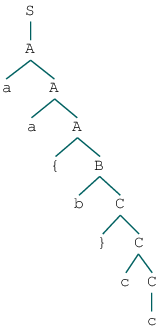

In [3]:
X = "aa{b}cc"
print("Árbol de generación de la cadena \"{}\"".format(X))

for tree in parser.parse(list(X)):
    display(tree) # tree.draw() arroja una ventana emergente

La siguiente gramática genera expresiones algebraicas en las variables $x$, $y$ y $z$, en notación infija.

In [4]:
grammar_alg = nltk.CFG.fromstring("""
    S -> 'x'
    S -> 'y'
    S -> 'z'
    S -> S '+' S
    S -> S '-' S
    S -> S '*' S
    S -> S '/' S
    S -> '(' S ')'
    """)

parser_alg = nltk.ChartParser(grammar_alg)
print(grammar_alg)

Grammar with 8 productions (start state = S)
    S -> 'x'
    S -> 'y'
    S -> 'z'
    S -> S '+' S
    S -> S '-' S
    S -> S '*' S
    S -> S '/' S
    S -> '(' S ')'


Y tratamos de generar la cadena $x + y * z$

Árbol de generación de la cadena "x + y * z"


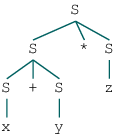

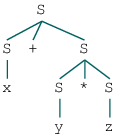

In [5]:
X_alg1 = "x + y * z"
print("Árbol de generación de la cadena \"{}\"".format(X_alg1))

for tree in parser_alg.parse(X_alg1.split()):
    display(tree)

Observamos que, al no haber reglas de precedencia, hay dos posibles formas de generar la cadena. Las reglas de precedencia son una forma de semántica, por lo que no corresponde a la fase de anáisis sintáctico (aunque es común realizar esa revisión en este paso).

Las gramáticas libres de contexto permiten especificar y analizar la generación de lenguajes naturales. Consideremos, por ejemplo, la siguiente versión de una gramática del español:

In [6]:
from nltk.tokenize import word_tokenize

grammar_sp = nltk.CFG.fromstring("""
    ORACION -> SUJETO PREDICADO '.'
    SUJETO -> FRASE_NOMINAL
    FRASE_NOMINAL -> GRUPO_NOMINAL
    FRASE_NOMINAL -> GRUPO_NOMINAL CALIFICATIVO
    GRUPO_NOMINAL -> NOMBRE
    GRUPO_NOMINAL -> ARTICULO NOMBRE
    CALIFICATIVO -> CONJUNCION ORACION
    CALIFICATIVO -> ADJETIVO
    PREDICADO -> VERBO COMPLEMENTOS
    COMPLEMENTOS -> DIRECTO INDIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> DIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> INDIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> CIRCUNSTANCIAL
    CIRCUNSTANCIAL -> 
    DIRECTO -> FRASE_NOMINAL
    INDIRECTO -> 'a' FRASE_NOMINAL
    CIRCUNSTANCIAL -> PREPOSICION FRASE_NOMINAL
    NOMBRE -> 'niña'
    NOMBRE -> 'María'
    NOMBRE -> 'comida'
    NOMBRE -> 'parque'
    ARTICULO -> 'la'
    ARTICULO -> 'el'
    VERBO -> 'pedía'
    PREPOSICION -> 'en'
    """)

parser_sp = nltk.ChartParser(grammar_sp)
print(grammar_sp)

Grammar with 25 productions (start state = ORACION)
    ORACION -> SUJETO PREDICADO '.'
    SUJETO -> FRASE_NOMINAL
    FRASE_NOMINAL -> GRUPO_NOMINAL
    FRASE_NOMINAL -> GRUPO_NOMINAL CALIFICATIVO
    GRUPO_NOMINAL -> NOMBRE
    GRUPO_NOMINAL -> ARTICULO NOMBRE
    CALIFICATIVO -> CONJUNCION ORACION
    CALIFICATIVO -> ADJETIVO
    PREDICADO -> VERBO COMPLEMENTOS
    COMPLEMENTOS -> DIRECTO INDIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> DIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> INDIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> CIRCUNSTANCIAL
    CIRCUNSTANCIAL -> 
    DIRECTO -> FRASE_NOMINAL
    INDIRECTO -> 'a' FRASE_NOMINAL
    CIRCUNSTANCIAL -> PREPOSICION FRASE_NOMINAL
    NOMBRE -> 'niña'
    NOMBRE -> 'María'
    NOMBRE -> 'comida'
    NOMBRE -> 'parque'
    ARTICULO -> 'la'
    ARTICULO -> 'el'
    VERBO -> 'pedía'
    PREPOSICION -> 'en'


Esta gramática permite generar frases como "la niña pedía comida.", "la niña pedía comida en el parque." y "*la niña pedía comida a María en el parque.*":

Árbol de generación de la cadena "la niña pedía comida."


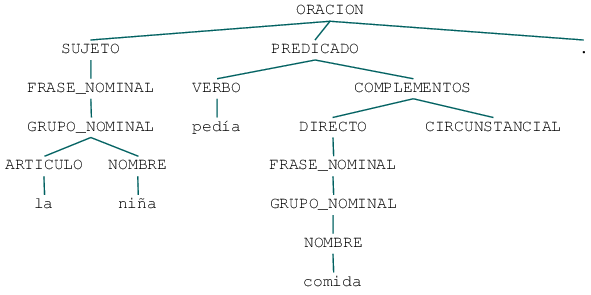

In [7]:
X_sp = "la niña pedía comida."
print("Árbol de generación de la cadena \"{}\"".format(X_sp))
for tree in parser_sp.parse(word_tokenize(X_sp)):
    display(tree) 

Árbol de generación de la cadena "la niña pedía comida en el parque."


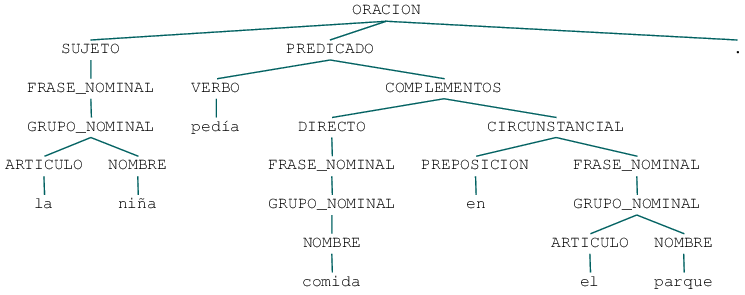

In [8]:
X2_sp = "la niña pedía comida en el parque."
print("Árbol de generación de la cadena \"{}\"".format(X2_sp))
for tree in parser_sp.parse(word_tokenize(X2_sp)):
    display(tree) 

Árbol de generación de la cadena "la niña pedía comida a María en el parque."


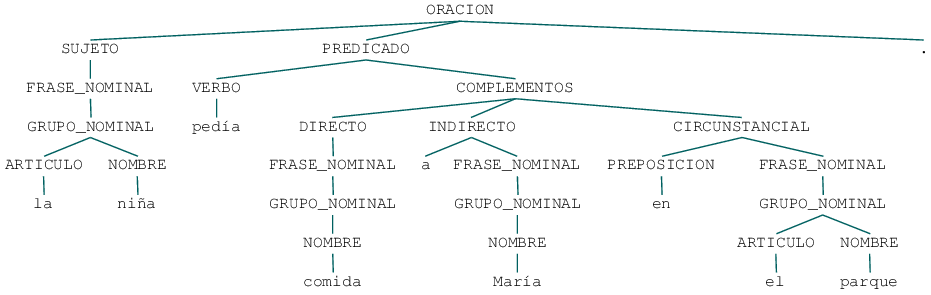

In [9]:
X3_sp = "la niña pedía comida a María en el parque."
print("Árbol de generación de la cadena \"{}\"".format(X3_sp))
for tree in parser_sp.parse(word_tokenize(X3_sp)):
    display(tree) 

Aunque también permite generar frases como "*la parque pedía parque en la parque.*":

Árbol de generación de la cadena "la parque pedía parque en la parque."


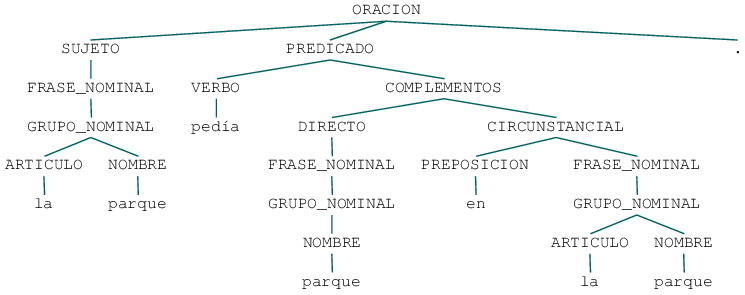

In [10]:
X4_sp = "la parque pedía parque en la parque."
print("Árbol de generación de la cadena \"{}\"".format(X4_sp))
for tree in parser_sp.parse(word_tokenize(X4_sp)):
    display(tree) 

... y muchas otras frases sin sentido:

In [12]:
import re
from nltk.parse.generate import generate

for sentence in generate(grammar_sp, n=20):
    print(re.sub(" \.", ".", ' '.join(sentence)))
print("...")

niña pedía niña a niña.
niña pedía niña a niña en niña.
niña pedía niña a niña en María.
niña pedía niña a niña en comida.
niña pedía niña a niña en parque.
niña pedía niña a niña en la niña.
niña pedía niña a niña en la María.
niña pedía niña a niña en la comida.
niña pedía niña a niña en la parque.
niña pedía niña a niña en el niña.
niña pedía niña a niña en el María.
niña pedía niña a niña en el comida.
niña pedía niña a niña en el parque.
niña pedía niña a María.
niña pedía niña a María en niña.
niña pedía niña a María en María.
niña pedía niña a María en comida.
niña pedía niña a María en parque.
niña pedía niña a María en la niña.
niña pedía niña a María en la María.
...


Podemos modificar ligeramente la gramática, agregando una regla adicional, para generar/reconocer una secuencia de frases:

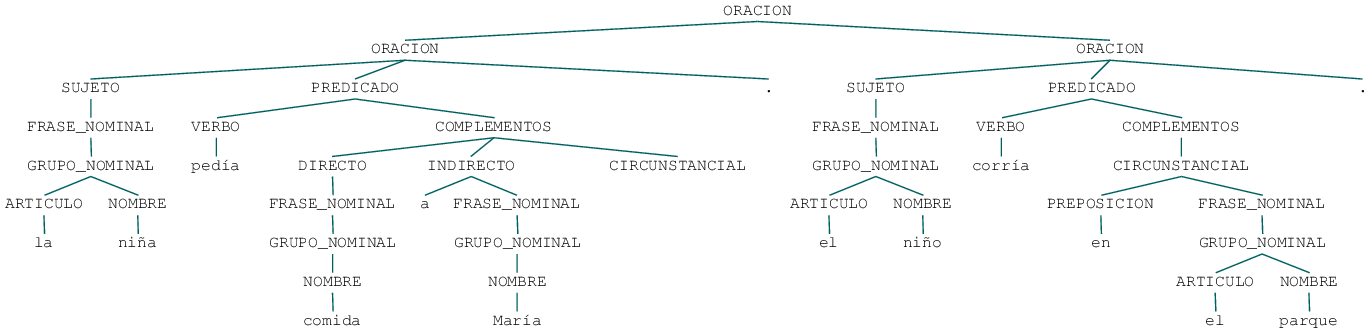

In [13]:
grammar2_sp = nltk.CFG.fromstring("""
    ORACION -> SUJETO PREDICADO '.' 
    ORACION -> ORACION ORACION
    SUJETO -> FRASE_NOMINAL
    FRASE_NOMINAL -> GRUPO_NOMINAL
    FRASE_NOMINAL -> GRUPO_NOMINAL CALIFICATIVO
    GRUPO_NOMINAL -> NOMBRE
    GRUPO_NOMINAL -> ARTICULO NOMBRE
    CALIFICATIVO -> CONJUNCION ORACION
    CALIFICATIVO -> ADJETIVO
    PREDICADO -> VERBO COMPLEMENTOS
    COMPLEMENTOS -> DIRECTO INDIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> DIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> INDIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> CIRCUNSTANCIAL
    CIRCUNSTANCIAL -> 
    DIRECTO -> FRASE_NOMINAL
    INDIRECTO -> 'a' FRASE_NOMINAL
    CIRCUNSTANCIAL -> PREPOSICION FRASE_NOMINAL
    NOMBRE -> 'niña'
    NOMBRE -> 'niño'
    NOMBRE -> 'María'
    NOMBRE -> 'comida'
    NOMBRE -> 'parque'
    ARTICULO -> 'la'
    ARTICULO -> 'el'
    VERBO -> 'pedía'
    VERBO -> 'corría'
    PREPOSICION -> 'en'
    """)

parser2_sp = nltk.ChartParser(grammar2_sp)

X3_sp = """la niña pedía comida a María. el niño corría en el parque. """
for tree in parser2_sp.parse(word_tokenize(X3_sp)):
    display(tree) 

El uso más directo del análisis sintáctico es la verificación de forma y estilo en un documento: ¿El documento está bien escrito, de acuerdo a alguna norma o estilo? ¿Los elementos de género y número están bien empleados? También es útil en la generación automática de lenguaje; en la creación automatizada, por ejemplo, de fregmentos de texto o en los sistemas de traducción.

Otra posibilidad de uso es para la determinación del sentido más probable de [palabras homónimas](https://es.wikipedia.org/wiki/Homonimia), esto es palabras que aunque se escriben de la misma manera, tienen significados diferentes, particularmente en el caso de homonimia gramatical: vela, vino, coma, monto, etc.

También puede ser de ayuda en la clasificación automatizada de los tokens en un lexicón.

## Gramáticas regulares

Las gramática de tipo 3, o "*gramáticas regulares*", generan lenguajes regulares. En estas gramáticas el lado izquierdo de las reglas debe contener un sólo símbolo que debe ser un terminal, mientras que el lado derecho sólo puede contener un símbolo terminal, posiblemente seguido (o antecedido) de un símbolo no terminal o la cadena vacía, es decir, las reglas pueden ser del tipo $A\to a$ o $A\to aB$ (si es gramática regular por la derecha) o $A\to\epsilon$, siendo $a\in\Sigma, A,B\in N$ y $\epsilon$ la cadena vacía.

Un uso muy exgendido de las gramáticas regulares es el reconocimiento de cadenas mediante expresiones regulares. Las expresiones regulares son descripciones sintéticas de lenguajes regulares

Aunque en este curso emplearemos Python como lenguaje de programación, el uso de expresiones regulares es muy similar en otros lenguajes.

### El módulo <code>re</code> de Python

El módulo <code>re</code> de Python ofrece una colección de métodos para realizar operaciones sobre cadenas; los siguientes son algunos de los métodos en este módulo:

#### <code>re.match(s, string)</code>: 
Determina si la cadena <code>string</code> inicia con la cadena <code>s</code>, por ejemplo:

In [14]:
string = "La oveja negra ya se ha juntado\n\
a otras ovejas negras como él.\n\
Como no hay hierba fresca en el prado\n\
comen coronas de laurel."

print("1.", re.match("La oveja", string))
print("2.", re.match("La oveja negra", string))
print("3.", re.match("oveja", string))


1. <_sre.SRE_Match object; span=(0, 8), match='La oveja'>
2. <_sre.SRE_Match object; span=(0, 14), match='La oveja negra'>
3. None


En el ejemplo anterior, la función ha encontrado que la cadena *string* inicia con "*La oveja*" o con "*La oveja negra*", peor no con "*oveja*".

#### <code>re.search(s, string)</code>: 
Busca si la cadena <code>s</code> es subcadena de <code>string</code> en cualquier punto. Regresa la primera ocurrencia.

In [15]:
print("4.", re.search("oveja", string))
print("5.", re.search("coronas de laurel", string))

4. <_sre.SRE_Match object; span=(3, 8), match='oveja'>
5. <_sre.SRE_Match object; span=(107, 124), match='coronas de laurel'>


#### <code>re.findall(s, string)</code>: 
Busca todas las ocurrencias de la cadena <code>s</code> en la cadena <code>string</code>, en cualquier punto y regresa las ocurrencias en una lista.

In [16]:
print("6.", re.findall("oveja", string))

6. ['oveja', 'oveja']


#### <code>re.finditer(s, string)</code>: 
Busca todas las ocurrencias de la cadena <code>s</code> en la cadena de <code>string</code> y regresa las ocurrencias en un iterador.

In [17]:
it = re.finditer("oveja", string)
res_idx = 7

for item in it:
    print("{}. {}".format(res_idx, item))
    res_idx += 1

7. <_sre.SRE_Match object; span=(3, 8), match='oveja'>
8. <_sre.SRE_Match object; span=(40, 45), match='oveja'>


#### <code>re.sub(s, r, string[, count=0])</code>: 
Busca todas las ocurrencias de la cadena <code>s</code> en la cadena de <code>string</code> y reemplaza por la cadena <code>r</code>. El argumento opcional <code>count</code> define el número máximo de reemplazos. El valor cero indico "*todas*".

In [18]:
str0 = re.sub("oveja", "nave", string)
print("9.", str0)

str1 = re.sub("oveja", "nave", string, count=1)
print("\n10.", str1)

9. La nave negra ya se ha juntado
a otras naves negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.

10. La nave negra ya se ha juntado
a otras ovejas negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.


### Identificación de patrones mediante expresiones regulares

La mayoría de los caracteres en una cadena son identificados de forma literal, como en el siguiente ejemplo:

In [19]:
print("\n11.", re.sub("oveja", "OVEJA", string))


11. La OVEJA negra ya se ha juntado
a otras OVEJAs negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.


Sin embargo, muchas partes de un lenguaje natural (subconjuntos de construcciones lingüísticas) pueden describirse como lenguajes regulares y, por lo tanto, pueden ser descritas mediante expresiones regulares. Es decir, gran parte de las cadenas en un lenguaje natural puede ser descrita mediante expresiones regulares. Por ejemplo, consideremos la siguiente gramática:

In [20]:
grammar_reg = nltk.CFG.fromstring("""
    S -> 'a' S
    S -> 'b' B
    B -> 'b' B
    B -> A
    A -> 'c' A
    A -> 
    """)

print(grammar_reg)

Grammar with 6 productions (start state = S)
    S -> 'a' S
    S -> 'b' B
    B -> 'b' B
    B -> A
    A -> 'c' A
    A -> 


Esta gramática genera cadenas del siguiente tipo:

In [21]:
for sentence in generate(grammar_reg, depth=6):
    print(''.join(sentence))

aaab
aabb
aabc
aab
abbb
abbc
abb
abcc
abc
ab
bbbb
bbbc
bbb
bbcc
bbc
bb
bccc
bcc
bc
b


Este conjunto de cadenas puede representarse como $\{a^*b^+c^*\}$, donde $x^*$ representa una subcadena formada por 0 o más repeticiones del caracter $x$, mientras que $x^+$ representa una subcadena formada por 1 o más repeticiones del caracter $x$. El símbolo especial $\ ^*$ se denomina *clausura de Kleene* o *estrella Kleene*, mientras que $\ ^+$ se denomina *cerradura/clausura/estrella positiva de Kleene*. 

La cerradura de Kleene y la cerradura positiva, son dos de los símbolos especiales empleados en la especificación de expresiones regulares. Otros símbolos utilizados en expresiones regulares son:

|Caracter |Resultado |
|---|----|
|**<code>'.'</code>** |El punto se empareja con cualquier caracter excepto el cambio de línea. Si se especifica la bandera <code>DOTALL</code> también empareja con el cambio de línea.|

In [22]:
print("\n12.", re.sub(".", "x", string))

print("\n13. Incluyendo DOTALL:\n{}".format(re.sub(".", "y", string, flags=re.DOTALL)))


12. xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxx

13. Incluyendo DOTALL:
yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy


|Caracter |Resultado |
|---|----|
|**<code>'^'</code>** |Establece que la substitución sólo se hara al inicio de la cadena. Si se especifica la bandera <code>MULTILINE</code> también se realizará al inicio de cada nueva línea.|

In [34]:
print("\n14.", re.sub("^.", "--", string))

print("\n15. Incluyendo MULTILINE:\n{}".format(re.sub("^.", "--", string, flags=re.MULTILINE)))


14. --a oveja negra ya se ha juntado
a otras ovejas negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.

15. Incluyendo MULTILINE:
--a oveja negra ya se ha juntado
-- otras ovejas negras como él.
--omo no hay hierba fresca en el prado
--omen coronas de laurel.


|Caracter |Resultado |
|---|----|
|**<code>'\A'</code>** | Establece que la substitución sólo se hara al inicio de la cadena. No es afectado por la bandera <code>MULTILINE</code>.|

In [24]:
print("\n16.", re.sub("\A.", "--", string))

print("\n17. Incluyendo MULTILINE:\n{}".format(re.sub("\A.", "--", string, flags=re.MULTILINE)))


16. --a oveja negra ya se ha juntado
a otras ovejas negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.

17. Incluyendo MULTILINE:
--a oveja negra ya se ha juntado
a otras ovejas negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.


|Caracter |Resultado |
|---|----|
|**<code>'$'</code>** |Establece que la substitución sólo se hará al final de la cadena. Si se especifica la bandera <code>MULTILINE</code> también se realizará al final de cada línea.|

In [25]:
print("\n18.", re.sub(".$", "--", string))

print("\n19. Incluyendo MULTILINE:\n{}".format(re.sub(".$", "--", string, flags=re.MULTILINE)))


18. La oveja negra ya se ha juntado
a otras ovejas negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel--

19. Incluyendo MULTILINE:
La oveja negra ya se ha juntad--
a otras ovejas negras como él--
Como no hay hierba fresca en el prad--
comen coronas de laurel--


|Caracter |Resultado |
|---|----|
|**<code>'[]'</code>** | Define un conjunto de caracteres. Pueden ser individuales (<code>'[abc]'</code>); en rango (<code>'[a-d]'</code>), se puede incluir el signo - utilizando la secuencia de escape <code>'\\-'</code> o colocándolo al final del conjunto (<code>'[a-d\-]'</code>). Caracteres especiales como  <code>'(', '+', '*', or ')'</code> pierden su significado dentro de los corchetes. El símbolo '^' representa el complemento (la negación de la expresión).|

In [38]:
print("\n20.", re.sub("[abc]", "x", string))

print("\n21. {}".format(re.sub("[d-g]", "x", string)))

print("\n22. {} -> {}".format("--a oveja negra ya se ha juntado",
                          re.sub("[a-d\-j]", "x", "--a oveja negra ya se ha juntado")))

print("\n23. {} -> {}".format("La estrella de Kleene (*)...",
                          re.sub("[(+*)]", "x", "La estrella de Kleene (*)...")))

print("\n24.", re.sub("[^abc]", "x", string))


20. Lx ovejx negrx yx se hx juntxdo
x otrxs ovejxs negrxs xomo él.
Como no hxy hierxx fresxx en el prxdo
xomen xoronxs de lxurel.

21. La ovxja nxxra ya sx ha juntaxo
a otras ovxjas nxxras como él.
Como no hay hixrba xrxsca xn xl praxo
comxn coronas xx laurxl.

22. --a oveja negra ya se ha juntado -> xxx ovexx negrx yx se hx xuntxxo

23. La estrella de Kleene (*)... -> La estrella de Kleene xxx...

24. xaxxxxxaxxxxxaxxaxxxxxaxxxxxaxxxaxxxxaxxxxxxaxxxxxxaxxcxxxxxxxxxxxxxxxxxaxxxxxxbaxxxxxcaxxxxxxxxxaxxxcxxxxxcxxxxaxxxxxxaxxxxx


|Caracter |Resultado |
|---|----|
|**<code>\w</code>** | Empareja con cualquier caracter de palabra: Un caracter unicode, un ideograma, un dígito o el guión bajo. |
|**<code>\W</code>** | Empareja con cualquier caracter que NO sea un caracter de palabra. |

In [27]:
print("\n24. {} -> {}".format("La estrella_de_Kleene (*)...",
                          re.sub("\w", "a", "La estrella_de_Kleene (*)...")))

print("\n25. {} -> {}".format("La estrella_de_Kleene (*)...",
                          re.sub("\W", "-", "La estrella_de_Kleene (*)...")))


24. La estrella_de_Kleene (*)... -> aa aaaaaaaaaaaaaaaaaa (*)...

25. La estrella_de_Kleene (*)... -> La-estrella_de_Kleene-------


|Caracter |Resultado |
|---|----|
|**<code>\s</code>** | Empareja con cualquier caracter de espacio; cualquier separador unicode. |
|**<code>\S</code>** | Empareja con cualquier caracter que NO sea un caracter de espacio/separeador. |

In [28]:
print("\n26. {} -> {}".format("La estrella_de_Kleene (*)...",
                          re.sub("\w", "a", "La estrella_de_Kleene (*)...")))

print("\n27. {} -> {}".format("La estrella_de_Kleene (*)...",
                          re.sub("\W", "-", "La estrella_de_Kleene (*)...")))


26. La estrella_de_Kleene (*)... -> aa aaaaaaaaaaaaaaaaaa (*)...

27. La estrella_de_Kleene (*)... -> La-estrella_de_Kleene-------


|Caracter |Resultado |
|---|----|
|**<code>'$'</code>** |Establece que la substitución sólo se hará al final de la cadena. Si se especifica la bandera <code>MULTILINE</code> también se realizará al final de cada línea.|

In [25]:
print("\n18.", re.sub(".$", "--", string))

print("\n19. Incluyendo MULTILINE:\n{}".format(re.sub(".$", "--", string, flags=re.MULTILINE)))


18. La oveja negra ya se ha juntado
a otras ovejas negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel--

19. Incluyendo MULTILINE:
La oveja negra ya se ha juntad--
a otras ovejas negras como él--
Como no hay hierba fresca en el prad--
comen coronas de laurel--


|Caracter |Resultado |
|---|----|
|**<code>\num** | Hace referencia al grupo que aparece en el orden señalado por *num*. Cada grupo se define mediante paréntesis. <code>\1</code> es, por ejemplo, el primer grupo que aparece en la expresión regular <code><([\w]+).*>(.*?)<\/\1></code>. En este caso la diagonal <code>\</code> se lee por separado de a etiqueta numérica, de manera que hay que utilizar cadenas en bruto (<code>r"\1"</code>) o especificar que se trata del caracter diagonal (<code>"\\\1"</code>).|

In [32]:
print("\n28. {} -> {}".format("La oveja oveja negra ya se ha juntado", 
                              re.sub(r"(\w+)\s+\1", "\\1", 
                                     "La oveja oveja negra ya se ha juntado")))


28. La oveja oveja negra ya se ha juntado -> La oveja negra ya se ha juntado


In [30]:
print("\n{} -> {}".format("--a oveja negra ya se ha juntado",
                          re.sub("[a-d\-j]", "x", "--a oveja negra ya se ha juntado")))


--a oveja negra ya se ha juntado -> xxx ovexx negrx yx se hx xuntxxo


In [31]:
re.search('={3}[\w]+={3}', "EJEMPLO ===funciona==parece") 

* URL's: <code>\w+:\/{2}[\d\w-]+(&#92;.[\d\w-]+)&#42;(?:(?:\/[^\s/]&#42;))&#42;</code>
![](images/regex01.png)<br>

* Tags de HTML: <code>(?i)<\/?\w+((\s+\w+(\s&#42;=\s&#42;(?:\".&#42;?\"|'.&#42;?'|[^'\">\s]+))?)+\s&#42;|\s&#42;)\/?></code>
![](images/regex02.png)<br>

* Passwords: <code>((?=.&#42;\d)(?=.&#42;[a-z])(?=.&#42;[A-Z])(?=.&#42;[@#$%]).{6,20})</code>
![](images/regex03.png)<br>

* Tags de HTML: <code><([\w]+).&#42;>(.&#42;?)<\/\1></code>
![](images/regex04.png)<br>

## Conclusiones

<hr style="border-width: 3px;">

### Tarea 1

Describa un problema de reconocimiento de patrones de su interés y explique por qué un modelo tradicional sería inapropiado para resolverlo (utilice la celda siguiente, en esta libreta, para presentar su problema seleccionado).

**Fecha de entrega**: Viernes 20 de enero.